In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

data_path = '/home/jithin/datasets/nlp_from_scratch/'
print(findFiles(data_path+'data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles(data_path+'data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/home/jithin/datasets/nlp_from_scratch/data/names/Scottish.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Spanish.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Portuguese.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Japanese.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Russian.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/English.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Irish.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Polish.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Greek.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Korean.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Italian.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Arabic.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/German.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Dutch.txt', '/home/jithin/datasets/nlp_from_scratch/data/names/Czech.txt', '/home/jithin/datasets/nlp_from

In [5]:
category_lines['English']

['Abbas',
 'Abbey',
 'Abbott',
 'Abdi',
 'Abel',
 'Abraham',
 'Abrahams',
 'Abrams',
 'Ackary',
 'Ackroyd',
 'Acton',
 'Adair',
 'Adam',
 'Adams',
 'Adamson',
 'Adanet',
 'Addams',
 'Adderley',
 'Addinall',
 'Addis',
 'Addison',
 'Addley',
 'Aderson',
 'Adey',
 'Adkins',
 'Adlam',
 'Adler',
 'Adrol',
 'Adsett',
 'Agar',
 'Ahern',
 'Aherne',
 'Ahmad',
 'Ahmed',
 'Aikman',
 'Ainley',
 'Ainsworth',
 'Aird',
 'Airey',
 'Aitchison',
 'Aitken',
 'Akhtar',
 'Akram',
 'Alam',
 'Alanson',
 'Alber',
 'Albert',
 'Albrighton',
 'Albutt',
 'Alcock',
 'Alden',
 'Alder',
 'Aldersley',
 'Alderson',
 'Aldred',
 'Aldren',
 'Aldridge',
 'Aldworth',
 'Alesbury',
 'Alexandar',
 'Alexander',
 'Alexnader',
 'Alford',
 'Algar',
 'Ali',
 'Alker',
 'Alladee',
 'Allam',
 'Allan',
 'Allard',
 'Allaway',
 'Allcock',
 'Allcott',
 'Alldridge',
 'Alldritt',
 'Allen',
 'Allgood',
 'Allington',
 'Alliott',
 'Allison',
 'Allkins',
 'Allman',
 'Allport',
 'Allsop',
 'Allum',
 'Allwood',
 'Almond',
 'Alpin',
 'Alsop',
 'A

In [6]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [11]:
len(all_letters), all_letters

(57, "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'")

In [13]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
rnn

RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax()
)

In [14]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [15]:
output

tensor([[-2.9059, -2.8346, -2.8727, -2.7948, -2.8131, -3.0398, -2.9007, -2.9491,
         -2.9061, -2.9828, -2.9409, -2.8110, -2.8185, -2.9242, -2.9049, -2.9070,
         -2.9034, -2.8521]], grad_fn=<LogSoftmaxBackward>)

In [16]:
next_hidden

tensor([[ 7.2772e-03, -7.7536e-02, -5.0508e-02,  7.4824e-02,  9.4218e-02,
          8.7881e-03,  1.6493e-03,  7.9770e-03,  1.4242e-02, -5.4138e-03,
         -3.6048e-03, -5.4193e-02, -1.3188e-01,  1.5336e-02, -5.4225e-03,
          4.2596e-02,  3.4537e-02, -2.7514e-02, -6.3720e-02, -5.7795e-02,
          1.1249e-02,  4.4932e-02, -4.1904e-02,  4.7198e-02, -9.6870e-03,
         -9.0508e-02,  9.7010e-03,  4.9155e-02,  7.8376e-02, -1.0947e-02,
         -4.9768e-04,  1.0190e-02,  2.0584e-02, -6.6059e-02,  5.4011e-02,
         -4.0638e-02, -6.9634e-03,  1.1067e-01, -1.0851e-01,  4.6891e-02,
          1.6306e-03,  1.7961e-03,  1.1361e-01,  1.8406e-02, -6.0209e-02,
          4.3974e-02, -4.0156e-02, -6.8188e-03,  8.1748e-05, -1.9348e-02,
         -1.0397e-02, -4.0023e-02, -1.5567e-02,  4.1841e-02, -9.8561e-02,
         -6.3462e-02, -3.3540e-02,  9.9811e-02,  1.1216e-01,  1.8653e-02,
          7.3524e-02, -9.8640e-02,  1.2663e-02,  3.1205e-02,  7.4180e-02,
          5.4370e-02,  1.7798e-02, -2.

In [17]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9059, -2.8346, -2.8727, -2.7948, -2.8131, -3.0398, -2.9007, -2.9491,
         -2.9061, -2.9828, -2.9409, -2.8110, -2.8185, -2.9242, -2.9049, -2.9070,
         -2.9034, -2.8521]], grad_fn=<LogSoftmaxBackward>)


In [18]:
output.shape

torch.Size([1, 18])

In [19]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Japanese', 3)


In [22]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)
    print('Category_tensor = ', category_tensor, 'line_tensor shape = ', line_tensor.shape)

category = Italian / line = Benenati
Category_tensor =  tensor([10]) line_tensor shape =  torch.Size([8, 1, 57])
category = French / line = Sartre
Category_tensor =  tensor([15]) line_tensor shape =  torch.Size([6, 1, 57])
category = English / line = Jervis
Category_tensor =  tensor([5]) line_tensor shape =  torch.Size([6, 1, 57])
category = Arabic / line = Hajjar
Category_tensor =  tensor([11]) line_tensor shape =  torch.Size([6, 1, 57])
category = Chinese / line = Rang
Category_tensor =  tensor([17]) line_tensor shape =  torch.Size([4, 1, 57])
category = English / line = Stott
Category_tensor =  tensor([5]) line_tensor shape =  torch.Size([5, 1, 57])
category = Spanish / line = Perez
Category_tensor =  tensor([1]) line_tensor shape =  torch.Size([5, 1, 57])
category = Chinese / line = Cao
Category_tensor =  tensor([17]) line_tensor shape =  torch.Size([3, 1, 57])
category = Czech / line = Divoky
Category_tensor =  tensor([14]) line_tensor shape =  torch.Size([6, 1, 57])
category = Po

In [23]:
criterion = nn.NLLLoss()


In [33]:
learning_rate = 0.006 # If you set this too high, it might explode. If too low, it might not learn
rnn = RNN(n_letters, n_hidden, n_categories)
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [34]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 13s) 1.7547 Thai / Chinese ✗ (Vietnamese)
10000 10% (0m 27s) 2.4855 Seaghdha / Japanese ✗ (Irish)
15000 15% (0m 39s) 1.7211 Brezovjak / Czech ✓
20000 20% (0m 53s) 1.8473 Schuyler / German ✗ (Dutch)
25000 25% (1m 2s) 2.6371 Ferrer / German ✗ (Spanish)
30000 30% (1m 11s) 0.4793 Ying / Chinese ✓
35000 35% (1m 25s) 1.3874 Fei / Vietnamese ✗ (Chinese)
40000 40% (1m 34s) 5.2553 Jones / Dutch ✗ (Scottish)
45000 45% (1m 48s) 0.3720 Albuquerque / Portuguese ✓
50000 50% (2m 0s) 1.9575 Hoult / French ✗ (English)
55000 55% (2m 12s) 1.4043 Chu / Korean ✗ (Vietnamese)
60000 60% (2m 25s) 2.0350 Damon / French ✗ (English)
65000 65% (2m 37s) 2.0226 Bradach / Czech ✗ (Irish)
70000 70% (2m 49s) 0.3718 Naser / Arabic ✓
75000 75% (3m 2s) 0.9285 Mertens / Dutch ✓
80000 80% (3m 13s) 0.6240 Ying / Chinese ✓
85000 85% (3m 25s) 0.2532 Aloisi / Italian ✓
90000 90% (3m 36s) 1.1248 Mackay / Scottish ✓
95000 95% (3m 47s) 2.2985 Cousins / French ✗ (English)
100000 100% (3m 58s) 2.5397 Fleming / German ✗ 

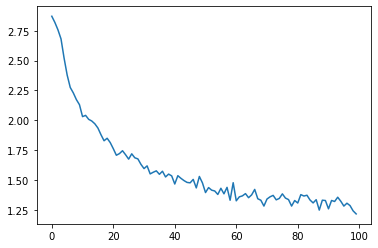

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

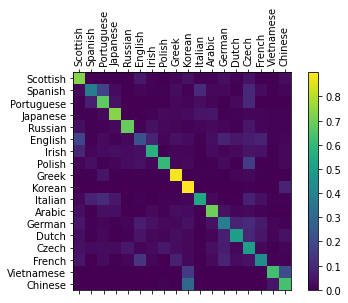

In [36]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [37]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.38) Czech
(-1.34) Russian
(-3.55) English

> Jackson
(-0.47) Scottish
(-1.62) English
(-2.92) Czech

> Satoshi
(-0.30) Arabic
(-2.33) Japanese
(-2.90) Czech


In [43]:
predict('Jameson')


> Jameson
(-0.88) Scottish
(-1.52) English
(-2.56) Czech
